# Sentiment Analysis using Tweets (Ukraine and Russia conflict) on Oil Price

#### Twitter API Setup
[Setting up of Code and Cleaning up tweets](https://medium.com/swlh/using-twitter-api-for-tweets-sentiment-analysis-590c97ce52d8)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import re 
import pandas as pd 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import csv 
import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud,STOPWORDS 
from nltk.stem.porter import PorterStemmer
import requests 
import json 

#### Establish Connection with the Project Dashboard (Twitter Developer API)

In [2]:
nltk.download('stopwords')
n_words = set(stopwords.words('english')) # stop words list 
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seylynkim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## References 

[Twitter Client Documentation V2 Endpoints (Tweepy Library)](https://docs.tweepy.org/en/stable/client.html)

In [14]:
#https://thecleverprogrammer.com/2022/03/15/ukraine-russia-war-twitter-sentiment-analysis-using-python/
df_tweet = pd.read_csv("tweet_data.csv") 

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df_tweet = df_tweet['tweet'].apply(lambda x : clean(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Preprocessing of Text

#### Analysing Sentiment 

analysis = TextBlob(tweet) 
senti = analysis.sentiment.polarity

if senti < 0: 
    emotion = "NEG"
elif senti > 0: 
    emotion = "POS" 
else: 
    emotion = "NEU"

In [119]:
def get_tweets(tweets_df): 
    tweets = [] 
    try: 
        for tweet in tweets_df.iteritems():
            analysis = TextBlob(str(tweet))
            senti= analysis.sentiment.polarity
            # labeling the sentiment
            if senti < 0 :
                emotion = "NEG"
            elif senti > 0 :
                emotion= "POS"
            else:
                emotion= "NEU"
            # appending all data
            tweets.append((tweet, senti, emotion))
        return tweets
    except tweepy.TweepyException as e: 
        print("Error : " + str(e))

In [121]:
# Get sentiment 
sentiment_table = get_tweets(tweets_df)

In [124]:
sentiment_df = pd.DataFrame(sentiment_table, columns=['tweet', 'senti', 'emotion'])

<BarContainer object of 3 artists>

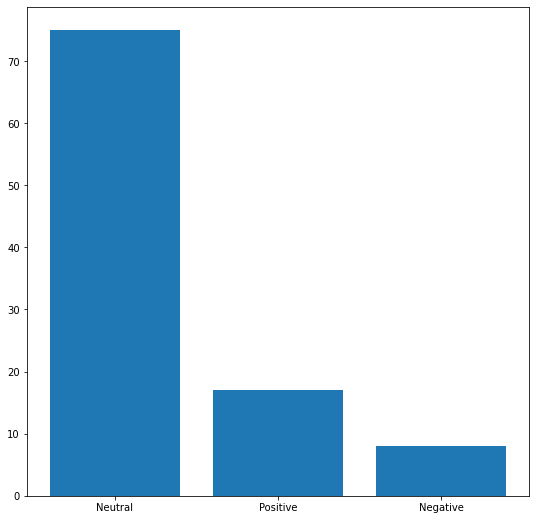

In [161]:
emotion_dict = {'Neutral': 75, 'Positive': 17, 'Negative': 8}

fig, axs = plt.subplots(figsize=(9,9), sharey=True)

names = list(emotion_dict.keys())
values = list(emotion_dict.values())

plt.bar(names, values)

<BarContainer object of 3 artists>

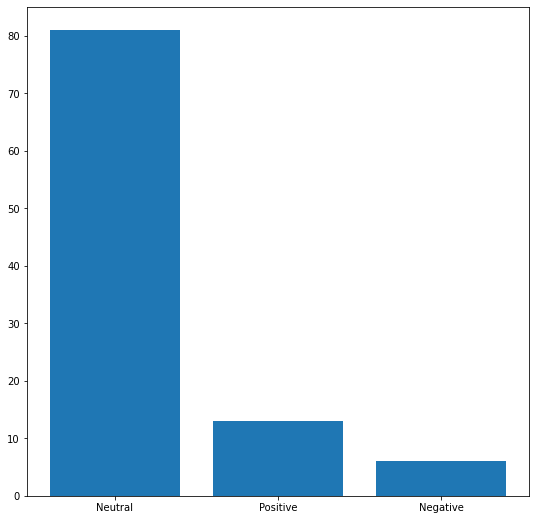

In [159]:
plot_values = {'Neutral': 81, 'Positive': 13, 'Negative' : 6}
values = list(plot_values.values())
names = list(plot_values.keys())

fig, axs = plt.subplots(figsize=(9, 9), sharey=True)
axs.bar(names, values)

In [52]:
import pandas as pd 
import yfinance as yf 
import yahoofinancials as YahooFinancials 

In [60]:
crude_oil_data = yf.download('CL=F', 
                      start='2021-10-31', 
                      end='2022-04-24', 
                      progress=False,
                             interval="1h"
)


In [61]:
date = crude_oil_data.index
crude_oil_df = pd.DataFrame(crude_oil_data, index=date)

In [62]:
crude_oil_data

,Open,High,Low,Close,Adj Close,Volume
2021-10-31 18:00:00-04:00,83.360001,83.370003,82.910004,83.010002,83.010002,4749
2021-10-31 19:00:00-04:00,82.989998,83.029999,82.739998,82.980003,82.980003,3671
2021-10-31 20:00:00-04:00,82.989998,83.239998,82.959999,83.080002,83.080002,3487
2021-10-31 21:00:00-04:00,83.070000,83.449997,82.870003,83.360001,83.360001,9454
2021-10-31 22:00:00-04:00,83.370003,83.419998,83.080002,83.120003,83.120003,4315
...,...,...,...,...,...,...
2022-04-22 13:00:00-04:00,102.250000,102.370003,101.720001,102.190002,102.190002,14272
2022-04-22 14:00:00-04:00,102.190002,102.250000,101.559998,101.750000,101.750000,23854
2022-04-22 15:00:00-04:00,101.739998,101.930000,101.589996,101.629997,101.629997,7799
2022-04-22 16:00:00-04:00,101.629997,101.790001,101.059998,101.750000,101.750000,4364


In [55]:
crude_oil_df_final = crude_oil_df.reset_index()

In [56]:
crude_oil_df_final.to_csv('Full_crude_oil_data.csv')